In [28]:
import tweepy
from textblob import TextBlob
import os
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# use os.environ.get to obtain other environment variables
# from ~/.bashrc or ~/.zshrc etc., so they aren't in your code
consumer_key='sA4Yb4juBQC304snRErN2gY9t'
consumer_secret='M2RwRwAwrUjgTkmmCcN8LqMP1fyRYJsGLD3uEQm8qXFCZrUSjv'

access_token='3134930196-SmYbtc2qOAuBNNVE0tsflSOaAmgJPn7iEjVxCgW'
access_secret='X2iYw1biIMn6Jn6TqNVf5Yvd9ppzkbA82Fat4CBbPMTzJ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

results = api.search(q='Narendra Modi', count=10000, lang = 'en')
json_data = [r._json for r in results]

df1 = pd.io.json.json_normalize(json_data)
df1

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,user.favourites_count,user.utc_offset,user.time_zone,user.geo_enabled,user.verified,user.statuses_count,user.lang,user.contributors_enabled,user.is_translator,user.is_translation_enabled,user.profile_background_color,user.profile_background_image_url,user.profile_background_image_url_https,user.profile_background_tile,user.profile_image_url,user.profile_image_url_https,user.profile_banner_url,user.profile_link_color,user.profile_sidebar_border_color,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.has_extended_profile,user.default_profile,user.default_profile_image,user.following,user.follow_request_sent,user.notifications,user.translator_type,user.withheld_in_countries,retweeted_status.created_at,retweeted_status.id,retweeted_status.id_str,retweeted_status.text,retweeted_status.truncated,retweeted_status.entities.hashtags,retweeted_status.entities.symbols,retweeted_status.entities.user_mentions,retweeted_status.entities.urls,retweeted_status.metadata.iso_language_code,retweeted_status.metadata.result_type,retweeted_status.source,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_status.in_reply_to_user_id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.user.id,retweeted_status.user.id_str,retweeted_status.user.name,retweeted_status.user.screen_name,retweeted_status.user.location,retweeted_status.user.description,retweeted_status.user.url,retweeted_status.user.entities.url.urls,retweeted_status.user.entities.description.urls,retweeted_status.user.protected,retweeted_status.user.followers_count,retweeted_status.user.friends_count,retweeted_status.user.listed_count,retweeted_status.user.created_at,retweeted_status.user.favourites_count,retweeted_status.user.utc_offset,retweeted_status.user.time_zone,retweeted_status.user.geo_enabled,retweeted_status.user.verified,retweeted_status.user.statuses_count,retweeted_status.user.lang,retweeted_status.user.contributors_enabled,retweeted_status.user.is_translator,retweeted_status.user.is_translation_enabled,retweeted_status.user.profile_background_color,retweeted_status.user.profile_background_image_url,retweeted_status.user.profile_background_image_url_https,retweeted_status.user.profile_background_tile,retweeted_status.user.profile_image_url,retweeted_status.user.profile_image_url_https,retweeted_status.user.profile_banner_url,retweeted_status.user.profile_link_color,retweeted_status.user.profile_sidebar_border_color,retweeted_status.user.profile_sidebar_fill_color,retweeted_status.user.profile_text_color,retweeted_status.user.profile_use_background_image,retweeted_status.user.has_extended_profile,retweeted_status.user.default_profile,retweeted_status.user.default_profile_image,retweeted_status.user.following,retweeted_status.user.follow_request_sent,retweeted_status.user.notifications,retweeted_status.user.translator_type,retweeted_status.user.withheld_in_countries,retweeted_status.geo,retweeted_status.coordinates,retweeted_status.place,retweeted_status.contributors,retweeted_status.is_quote_status,retweeted_status.retweet_count,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.retweeted,retweeted_status.possibly_sensitive,retweeted_status.lang,user.entities.url.urls,quoted_status_id,quoted_status_id_str,quoted_status.created

In [29]:
df=pd.DataFrame(df1['text'])
df['text']=df['text'].apply(lambda x: re.sub(r'\bT\b','',x).strip())
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(df)

                                                 text
0   The kind of same interest which is shown to st...
1   RT @thewire_in: The Lancet severely criticised...
2   RT @thewire_in: The Lancet severely criticised...
3   RT @Soumyadipta: I have been listening to many...
4   RT @ss_suryawanshi: In the morning, PM Narendr...
5   RT @Soumyadipta: Too much dependence on Brand ...
6   RT @Joydas: All the carefully constructed PR o...
7   RT @t_d_h_nair: With its inactions, Narendra M...
8   RT @Soumyadipta: There is major feedback about...
9   RT @raosaheboffice: Trade and beyond: A new im...
10  RT @Soumyadipta: Oh I forgot!\nA major feedbac...
11  RT @alfonslopeztena: Antidemocratic politics w...
12  RT @Soumyadipta: I have been listening to many...
13  RT @Divyanshi_486: Is Amit above Prime Ministe...
14  RT @thewire_in: The Lancet severely criticised...
15  RT @t_d_h_nair: With its inactions, Narendra M...
16  RT @Joydas: All the carefully constructed PR o...
17  RT @Joydas: All the care

In [3]:
labels=[]
for tweet in df['text']:
    #print(tweet)
    analysis = TextBlob(tweet)
    #print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        labels.append(1)
    elif analysis.sentiment[0]<0:
        labels.append(-1)
    else:
        labels.append(0)

In [4]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())


# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])


# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df['label']= labels

In [5]:
df.head(30)

,text,clean_tweet,label
0,RT @DrSJaishankar: A forward-looking joint op-...,forward look joint portugues set tone,0
1,RT @Vivekbjpit_UP_: I Support Narendra Modi Ji...,support narendra modi support modi retweet htt...,0
2,RT @RanaAyyub: Blame Muslims for the covid car...,blame muslim covid carnag say proud support na...,0
3,RT @Joydas: All the carefully constructed PR o...,care construct narendra modi global been compl...,0
4,RT @ANUJKUMARSAW8: I Support Narendra Modi Ji....,support narendra modi support modi retweet,0
5,RT @9_suja: #TheGreatProphecies_Revealed\n\nWh...,#thegreatpropheci reveal savior world sant ram...,0
6,RT @Joydas: All the carefully constructed PR o...,care construct narendra modi global been compl...,0
7,RT @Soumyadipta: I have been listening to many...,have been listen mani space most whom ardent s...,1
8,RT @bhatia_niraj23: System created in past 70 ...,system creat past year previou prime minist in...,-1
9,RT @RanaAyyub: Blame Muslims for the covid car...,blame muslim covid carnag say proud support na...,0


In [14]:
df['label'].value_counts()

# y=[60,26,14]
# mylabel=['neutral','positive','negative']
# plt.pie(y, labels = mylabel)
# plt.show() 

 0    62
 1    26
-1    12
Name: label, dtype: int64

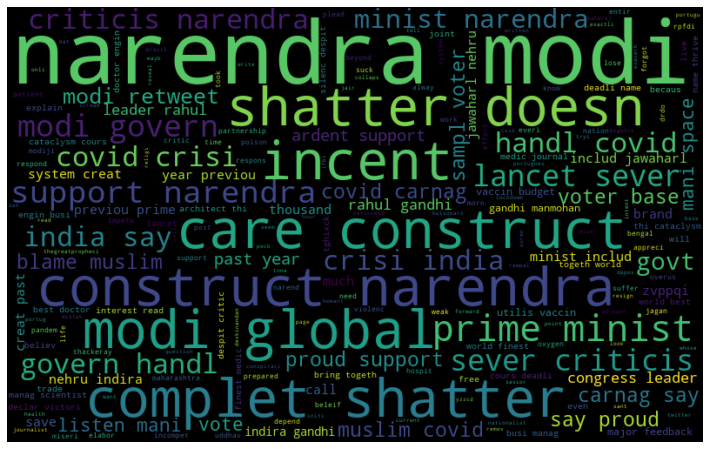

In [7]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'],random_state=42, test_size=0.25)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [11]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
# testing
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.92

In [13]:
import sklearn.metrics.classification_report

ModuleNotFoundError: No module named 'sklearn.metrics.classification_report'